# Explore the catalog

Here, we want to observe the distribution of data in our catalog.

In [1]:
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

import catalog
import computations as cp
import figures
import histograms
import matrix

tqdm.pandas()

catalog.display_params_for_catalog()

## Load the catalog

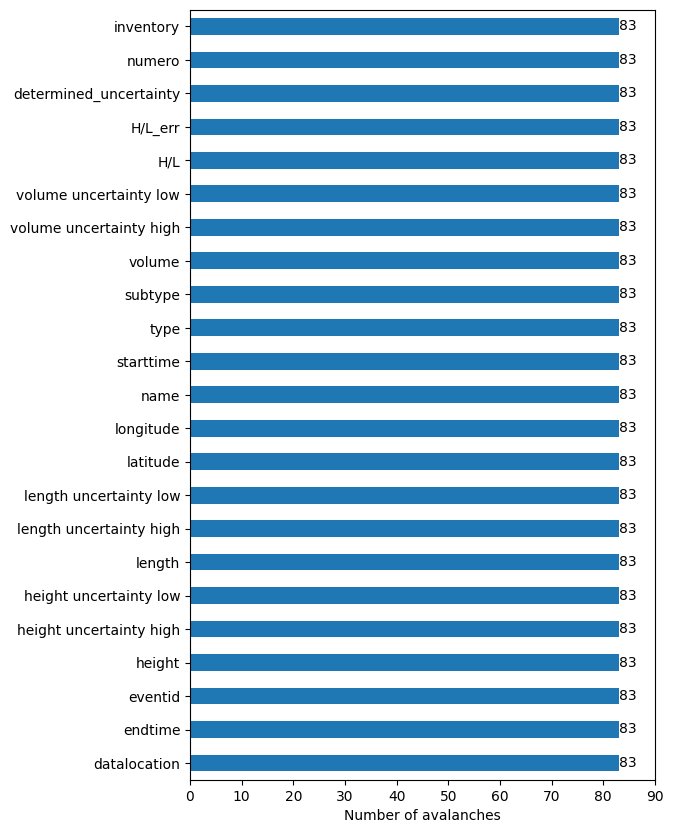

In [2]:
ESEC_avalanches = catalog.load("catalog/5_ESEC_avalanches_83.pickle")

histograms.open_catalog(ESEC_avalanches, 0.11, 90)

## Distribution of types

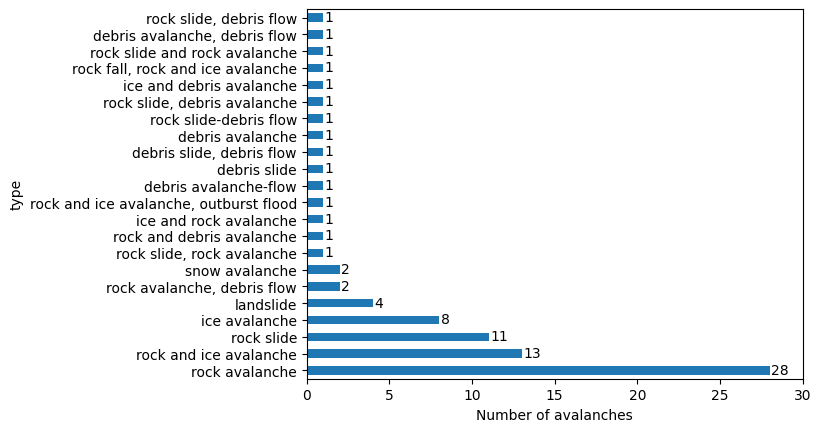

In [3]:
#Histogram of type
histograms.see_word_distribution(ESEC_avalanches["type"], 0.21, 30)

figures.save("figures/histograms_type.pdf", tight_layout=False)

## Distribution of subtypes

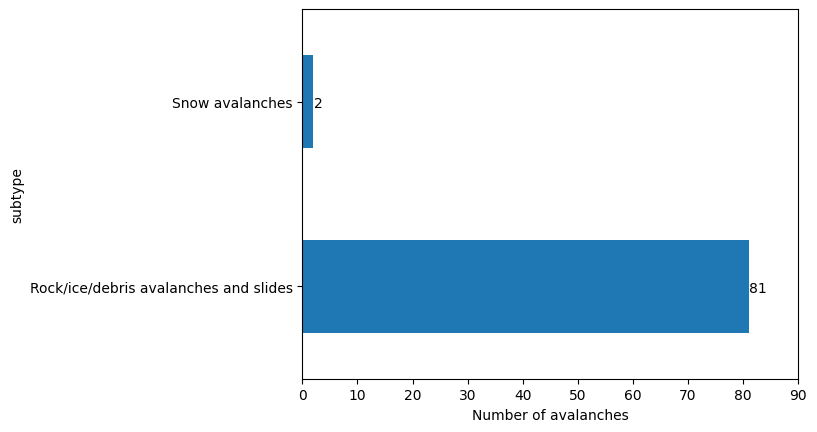

In [4]:
#Histogram of subtype
histograms.see_word_distribution(ESEC_avalanches["subtype"], 0.03, 90)

figures.save("figures/histograms_subtype.pdf", tight_layout=False)

## Distribution of morphometric parameters

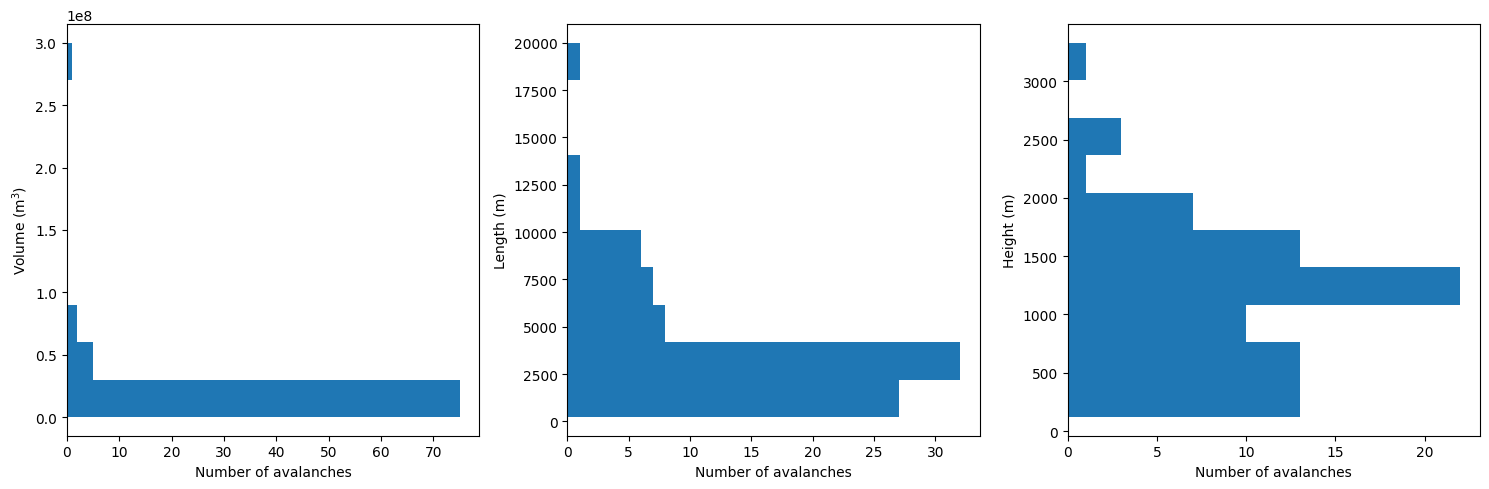

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#Histogram of volume
histograms.see_number_distribution(ESEC_avalanches["volume"], axs[0], r"Volume $\mathrm{(m^3)}$")

#Histogram of length
histograms.see_number_distribution(ESEC_avalanches["length"], axs[1], "Length (m)")

#Histogram of height
histograms.see_number_distribution(ESEC_avalanches["height"], axs[2], "Height (m)")

figures.save("figures/histograms_morphometric_parameters.pdf", tight_layout=True)

## Distribution of number of stations

  0%|          | 0/83 [00:00<?, ?it/s]

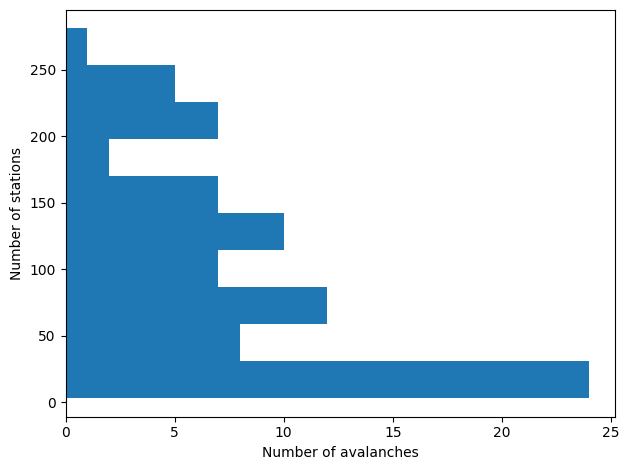

In [7]:
#loop for add the number of stations for each event in a new column
ESEC_avalanches = cp.compute_number_of_stations(ESEC_avalanches, print = False)

_, ax = plt.subplots(1, 1)
histograms.see_number_distribution(ESEC_avalanches["Number of stations"], ax, "Number of stations")

figures.save("figures/histograms_number_of_stations.pdf", tight_layout=True)

ESEC_avalanches.to_pickle("catalog/6_ESEC_avalanches_83.pickle")

## Compare column values

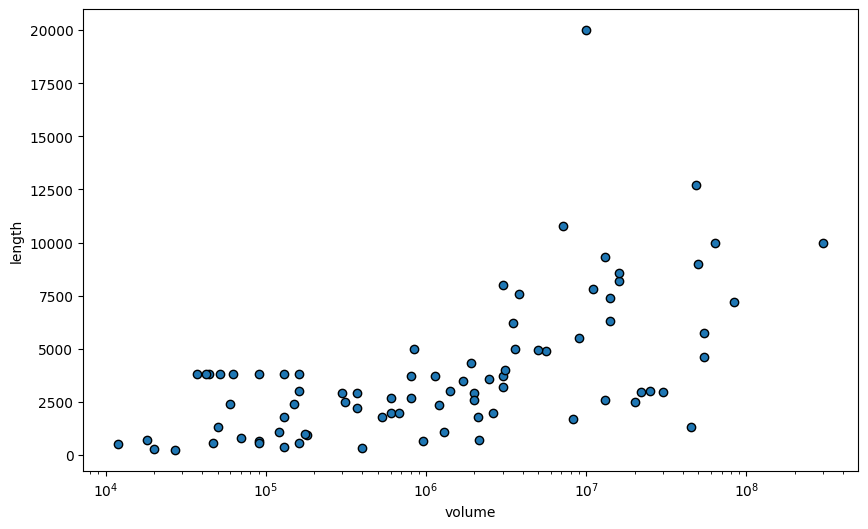

<Figure size 640x480 with 0 Axes>

In [8]:
#"volume", "latitude", "longitude", "type", "subtype", "length", "height", "H/L", "Number of stations"

X = "volume"
Y = "length"

figures.scatter_plot(ESEC_avalanches[X], ESEC_avalanches[Y], X, Y)

figures.save(f"figures/scatter_plot/scatter_plot_{X}_{Y}.pdf", tight_layout=True)

## Create a correlation matrix for see the relation between columns

                      volume    height    length       H/L  latitude  \
volume              1.000000  0.457368  0.376532 -0.179219 -0.152173   
height              0.457368  1.000000  0.687462 -0.295636  0.146213   
length              0.376532  0.687462  1.000000 -0.600707 -0.008914   
H/L                -0.179219 -0.295636 -0.600707  1.000000 -0.044785   
latitude           -0.152173  0.146213 -0.008914 -0.044785  1.000000   
longitude           0.317038 -0.030703 -0.146070  0.284583 -0.622076   
Number of stations -0.200953 -0.221685 -0.133643  0.015641  0.181134   

                    longitude  Number of stations  
volume               0.317038           -0.200953  
height              -0.030703           -0.221685  
length              -0.146070           -0.133643  
H/L                  0.284583            0.015641  
latitude            -0.622076            0.181134  
longitude            1.000000           -0.408226  
Number of stations  -0.408226            1.000000  


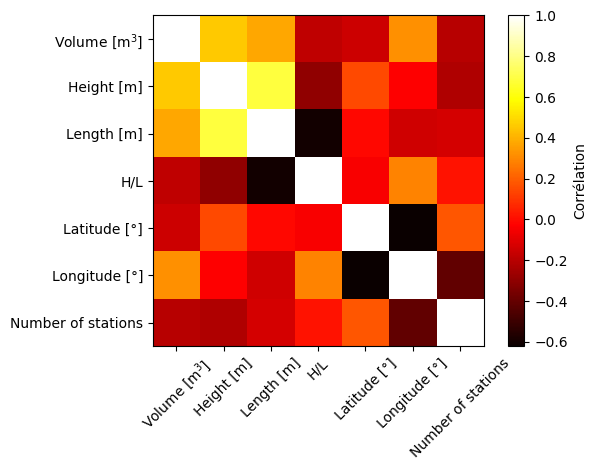

In [9]:
columns = ["volume", "height", "length", "H/L", "latitude", "longitude", "Number of stations"]
label = [r"Volume [$\mathrm{m^3}$]", "Height [m]", "Length [m]", "H/L", "Latitude [°]", "Longitude [°]", "Number of stations"]

data_to_correlate = ESEC_avalanches[columns]

matrix.correlation_matrix(data_to_correlate, label, print_data=True)

figures.save(f"figures/correlation_matrix.pdf", tight_layout=True)